In [1]:
import pandas as pd
import json
from pandas.io.json import json_normalize

#for importing files
import glob, os
import matplotlib.pyplot as plt
%matplotlib inline

## Read Play by play data

In [2]:
events_df = pd.read_csv('0021500492.csv')

In [3]:
events_df

,GAME_ID,EVENTNUM,EVENTMSGTYPE,EVENTMSGACTIONTYPE,PERIOD,WCTIMESTRING,PCTIMESTRING,HOMEDESCRIPTION,NEUTRALDESCRIPTION,VISITORDESCRIPTION,...,PLAYER2_TEAM_CITY,PLAYER2_TEAM_NICKNAME,PLAYER2_TEAM_ABBREVIATION,PERSON3TYPE,PLAYER3_ID,PLAYER3_NAME,PLAYER3_TEAM_ID,PLAYER3_TEAM_CITY,PLAYER3_TEAM_NICKNAME,PLAYER3_TEAM_ABBREVIATION
0,21500492,0,12,0,1,7:41 PM,12:00,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN
1,21500492,1,10,0,1,7:41 PM,12:00,Jump Ball Valanciunas vs. Zeller: Tip to Lowry,NaN,NaN,...,Charlotte,Hornets,CHA,4,200768,Kyle Lowry,1.610613e+09,Toronto,Raptors,TOR
2,21500492,2,2,101,1,7:42 PM,11:41,MISS Scola 5' Driving Floating Jump Shot,NaN,Zeller BLOCK (1 BLK),...,NaN,NaN,NaN,5,203469,Cody Zeller,1.610613e+09,Charlotte,Hornets,CHA
3,21500492,3,4,0,1,7:42 PM,11:39,Valanciunas REBOUND (Off:1 Def:0),NaN,NaN,...,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN
4,21500492,4,1,87,1,7:42 PM,11:35,Valanciunas Putback Dunk (2 PTS),NaN,NaN,...,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN
5,21500492,5,1,48,1,7:42 PM,11:25,NaN,NaN,Zeller 1' Dunk (2 PTS) (Batum 1 AST),...,Charlotte,Hornets,CHA,0,0,NaN,NaN,NaN,NaN,NaN
6,21500492,6,2,86,1,7:42 PM,11:06,MISS Lowry 16' Turnaround Fadeaway Shot,NaN,NaN,...,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN
7,21500492,7,4,0,1,7:42 PM,11:06,NaN,NaN,Williams REBOUND (Off:0 Def:1),...,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN
8,21500492,9,1,81,1,7:42 PM,10:59,NaN,NaN,Batum 16' Pullup Bank Shot (2 PTS),...,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN
9,21500492,10,6,2,1,7:43 PM,10:33,NaN,NaN,Zeller S.FOUL (P1.T1) (M.Davis),...,Toronto,Raptors,TOR,1,0,NaN,NaN,NaN,NaN,NaN


## Filter event with STLS or etc...
Step-by-step explanation (from inner to outer):

df['ids'] selects the ids column of the data frame (techincally, the object df[ids] is of type pandas.Series)

df['ids'].str allows us to apply vectorized string methods (e.g., lower, contains) to the Series

df['ids'].str.contains('ball') checks each element of the Series as to whether the element value has the string 'ball' as a substring. The result is a Series of Booleans indicating True or False about the existence of a 'ball' substring.

df[df['ids'].str.contains('ball')] applies the Boolean 'mask' to the dataframe and returns a view containing appropriate records.

na = False removes NA / NaN values from consideration; otherwise a ValueError may be returned.


## Parse by EVENTMSGTYPE # with AST,STL boxscore filtered in Home/Visitor Description

In [4]:
dfEmpty = pd.DataFrame()

In [5]:
dfEmpty

""


In [6]:
ASTList = events_df[events_df['EVENTMSGTYPE'].isin([1,2]) & ( events_df['VISITORDESCRIPTION'].str.contains("AST", na = False ) | events_df['HOMEDESCRIPTION'].str.contains("AST", na = False )  ) ]

In [7]:
print(ASTList)

      GAME_ID  EVENTNUM  EVENTMSGTYPE  EVENTMSGACTIONTYPE  PERIOD  \
5    21500492         5             1                  48       1   
20   21500492        24             1                 100       1   
24   21500492        28             1                   1       1   
26   21500492        30             1                  98       1   
32   21500492        36             1                   1       1   
40   21500492        47             1                  46       1   
41   21500492        48             1                   1       1   
52   21500492        62             1                   1       1   
53   21500492        63             1                   1       1   
73   21500492        86             1                   1       1   
125  21500492       145             1                   1       2   
130  21500492       153             1                 101       2   
135  21500492       161             1                   1       2   
146  21500492       174           

In [8]:
ASTList.to_csv("asts.csv", sep='\t')

In [9]:
BadPassList= events_df[( events_df['VISITORDESCRIPTION'].str.contains("Bad", na = False ) | events_df['HOMEDESCRIPTION'].str.contains("Bad", na = False )  ) ]

In [10]:
print(BadPassList)

      GAME_ID  EVENTNUM  EVENTMSGTYPE  EVENTMSGACTIONTYPE  PERIOD  \
21   21500492        25             5                   1       1   
31   21500492        35             5                   1       1   
39   21500492        46             5                   1       1   
49   21500492        59             5                  45       1   
70   21500492        82             5                  45       1   
177  21500492       212             5                   1       2   
231  21500492       282             5                   1       3   
258  21500492       326             5                   1       3   
298  21500492       365             5                   1       3   
307  21500492       374             5                  45       3   
351  21500492       429             5                  45       4   
417  21500492       510             5                   1       4   
433  21500492       528             5                   1       4   

    WCTIMESTRING PCTIMESTRING  \


In [11]:
BadPassList.to_csv("badpasses.csv", sep='\t')

In [12]:
AlleyOopList= events_df[events_df['EVENTMSGTYPE'].isin([1,2]) & ( events_df['VISITORDESCRIPTION'].str.contains("Alley", na = False ) | events_df['HOMEDESCRIPTION'].str.contains("Alley", na = False )  ) ]

In [13]:
AlleyOopList.to_csv("alleyoop.csv", sep='\t')

## Extracts Assists, Bad Passes, Alley Oops from csvs in current directory and saves them into separate csv files

In [8]:
AST_df = pd.DataFrame()
BadPass_df = pd.DataFrame()
AlleyOop_df = pd.DataFrame()
#curPath = os.getcwd()
curPath = "D:\\DataMining-NBA-Repo\\JupyterNotebooks\\"
print curPath
os.chdir(curPath+'\pbp-csv-full')
for pbpFile in glob.glob("*.csv"):
    print(pbpFile)
    #read file as df
    events_df = pd.read_csv(pbpFile)
    ASTList = events_df[events_df['EVENTMSGTYPE'].isin([1,2]) & ( events_df['VISITORDESCRIPTION'].str.contains("AST", na = False ) | events_df['HOMEDESCRIPTION'].str.contains("AST", na = False )  ) ]
    BadPassList= events_df[( events_df['VISITORDESCRIPTION'].str.contains("Bad", na = False ) | events_df['HOMEDESCRIPTION'].str.contains("Bad", na = False )  ) ]
    AlleyOopList= events_df[events_df['EVENTMSGTYPE'].isin([1,2]) & ( events_df['VISITORDESCRIPTION'].str.contains("Alley", na = False ) | events_df['HOMEDESCRIPTION'].str.contains("Alley", na = False )  ) ]
    AST_df = AST_df.append(ASTList)
    BadPass_df = BadPass_df.append(BadPassList)
    AlleyOop_df = AlleyOop_df.append(AlleyOopList)
    
AST_df.to_csv("AST_Parsed.csv", sep='\t')
BadPass_df.to_csv("BadPass_Parsed.csv", sep='\t')
AlleyOop_df.to_csv("AlleyOop_Parsed.csv", sep='\t')
    

D:\DataMining-NBA-Repo\JupyterNotebooks\
0021500001.csv
0021500002.csv
0021500003.csv
0021500004.csv
0021500005.csv
0021500007.csv
0021500009.csv
0021500010.csv
0021500011.csv
0021500012.csv
0021500013.csv
0021500015.csv
0021500016.csv
0021500017.csv
0021500018.csv
0021500019.csv
0021500020.csv
0021500021.csv
0021500022.csv
0021500023.csv
0021500024.csv
0021500025.csv
0021500026.csv
0021500027.csv
0021500028.csv
0021500029.csv
0021500031.csv
0021500032.csv
0021500033.csv
0021500034.csv
0021500035.csv
0021500036.csv
0021500037.csv
0021500038.csv
0021500039.csv
0021500040.csv
0021500041.csv
0021500042.csv
0021500043.csv
0021500044.csv
0021500045.csv
0021500046.csv
0021500047.csv
0021500048.csv
0021500049.csv
0021500050.csv
0021500051.csv
0021500052.csv
0021500053.csv
0021500054.csv
0021500055.csv
0021500056.csv
0021500057.csv
0021500058.csv
0021500059.csv
0021500060.csv
0021500061.csv
0021500062.csv
0021500063.csv
0021500064.csv
0021500065.csv
0021500066.csv
0021500067.csv
0021500068.csv

0021500554.csv
0021500555.csv
0021500556.csv
0021500557.csv
0021500558.csv
0021500559.csv
0021500560.csv
0021500561.csv
0021500562.csv
0021500563.csv
0021500564.csv
0021500565.csv
0021500566.csv
0021500567.csv
0021500568.csv
0021500569.csv
0021500570.csv
0021500571.csv
0021500572.csv
0021500573.csv
0021500574.csv
0021500575.csv
0021500576.csv
0021500577.csv
0021500578.csv
0021500579.csv
0021500580.csv
0021500581.csv
0021500582.csv
0021500583.csv
0021500584.csv
0021500585.csv
0021500586.csv
0021500591.csv
0021500592.csv
0021500593.csv
0021500594.csv
0021500595.csv
0021500596.csv
0021500597.csv
0021500598.csv
0021500599.csv
0021500600.csv
0021500601.csv
0021500615.csv
0021500616.csv
0021500617.csv
0021500618.csv
0021500619.csv
0021500620.csv
0021500621.csv
0021500622.csv
0021500623.csv
0021500624.csv
0021500625.csv
0021500626.csv
0021500627.csv
0021500628.csv
0021500629.csv
0021500630.csv
0021500631.csv
0021500632.csv
0021500633.csv
0021500634.csv
0021500635.csv
0021500636.csv
0021500637

## Summary of Extracted Bad Passes csv
Players with at least 30 bad passes in total dataset

In [17]:
badPasses = BadPass_df.PLAYER1_NAME.value_counts()
print len(BadPass_df)

8446


John Wall                  118
Russell Westbrook          115
Rajon Rondo                113
James Harden               112
Paul George                 89
Damian Lillard              85
Stephen Curry               85
Brandon Knight              79
LeBron James                77
Draymond Green              74
Michael Carter-Williams     73
Kyle Lowry                  72
Reggie Jackson              71
Nicolas Batum               67
Eric Bledsoe                67
Jarrett Jack                63
Monta Ellis                 63
Ricky Rubio                 63
Jeff Teague                 62
Chris Paul                  62
D'Angelo Russell            59
Deron Williams              59
Emmanuel Mudiay             57
Kevin Durant                56
Derrick Rose                56
Kobe Bryant                 55
Isaiah Thomas               55
Dwyane Wade                 53
Kemba Walker                53
Ish Smith                   51
                          ... 
Andre Iguodala              37
Klay Tho

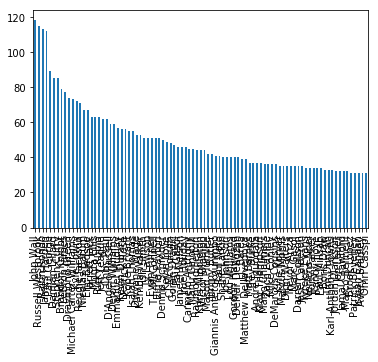

In [18]:
minBadPasses = 30
print badPasses[badPasses > minBadPasses]
badPasses[badPasses > minBadPasses].plot(kind='bar')

### Summary of Extracted Successful AlleyOops csv
Players with at least 10 alleys in total dataset

In [19]:
alleyOopsSuccess = AlleyOop_df.PLAYER2_NAME.value_counts()
print len(AlleyOop_df)

1245


Russell Westbrook      37
Chris Paul             36
James Harden           35
Reggie Jackson         34
Ish Smith              31
Rajon Rondo            30
Draymond Green         30
Matthew Dellavedova    30
Dwyane Wade            28
Pau Gasol              19
Stephen Curry          18
Kyle Lowry             15
Blake Griffin          14
Jamal Crawford         13
J.J. Barea             13
John Wall              13
Eric Bledsoe           13
Jrue Holiday           13
Brandon Knight         12
Klay Thompson          12
Khris Middleton        11
Tim Duncan             11
Name: PLAYER2_NAME, dtype: int64


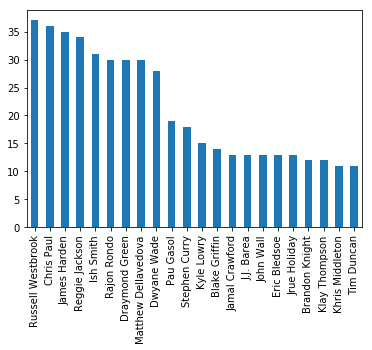

In [20]:
minAlleys = 10
print alleyOopsSuccess[alleyOopsSuccess > minAlleys]
alleyOopsSuccess[alleyOopsSuccess > minAlleys].plot(kind='bar')

In [21]:
# Total Alley Oops by team in season?
print AlleyOop_df.PLAYER1_TEAM_ABBREVIATION.value_counts()

LAC    103
HOU     99
GSW     86
CLE     69
PHX     60
OKC     59
DET     59
NOP     55
SAC     53
DAL     47
MIA     46
MIL     44
PHI     42
CHI     36
ATL     33
SAS     33
NYK     30
DEN     30
UTA     28
POR     27
MIN     27
TOR     25
BKN     24
BOS     23
MEM     23
WAS     19
ORL     18
LAL     18
IND     15
CHA     14
Name: PLAYER1_TEAM_ABBREVIATION, dtype: int64


### Summary of Extracted Assists csv
Players with at least 100 assists in total dataset

In [9]:
ASTSuccess = AST_df.PLAYER2_NAME.value_counts()
print len(AST_df)

27657


Rajon Rondo                448
Russell Westbrook          424
John Wall                  383
Chris Paul                 343
Ricky Rubio                331
James Harden               300
Draymond Green             298
Isaiah Thomas              280
Reggie Jackson             277
Kyle Lowry                 271
Damian Lillard             268
Stephen Curry              266
Ish Smith                  241
LeBron James               233
Mike Conley                227
Elfrid Payton              225
Michael Carter-Williams    225
Jarrett Jack               222
Jeff Teague                218
Monta Ellis                212
Kemba Walker               211
Brandon Knight             211
Name: PLAYER2_NAME, dtype: int64


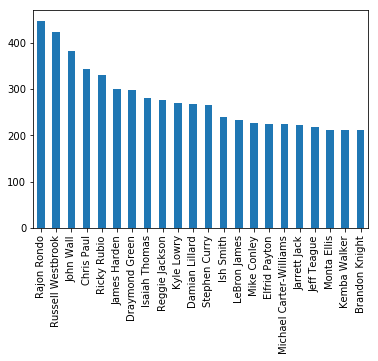

In [10]:
minAST = 200
print ASTSuccess[ASTSuccess > minAST]
ASTSuccess[ASTSuccess > minAST].plot(kind='bar')